In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy.signal import savgol_filter

In [5]:
data_3 = np.loadtxt('exp_results/PV_3f_Fig1.csv', skiprows = 2, delimiter = ',', usecols=(0,1,2,3,4))

vol_3 = np.mean(data_3[:,[0]], axis = 1)
pressure_3 = np.mean(data_3[:,[1,2,3,4]], axis = 1)

R_3 = 8 #mm
H_3 = 20 #mm

vol_03 = np.pi * R_3 * R_3 * H_3 * 1e-3 #mm^3 * 1000 should be cm^3 aka mL


True


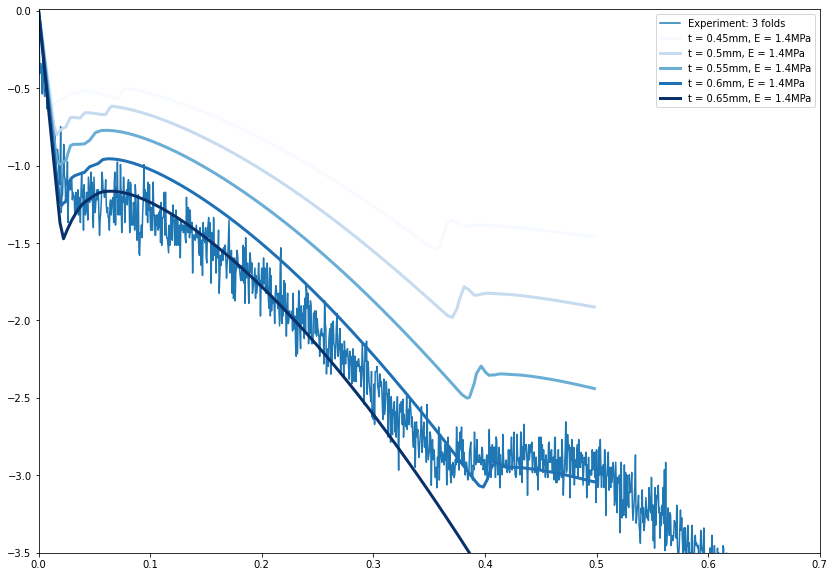

In [13]:
E_try = [1.4]
t_try = [0.45, 0.5, 0.55, 0.60, 0.65]
initial_idx = 300

fig, ax = plt.subplots(figsize = (14,10))
ax.plot(vol_3/vol_03-0.02, pressure_3, label = 'Experiment: 3 folds')
cmap_all = ['Blues', 'Reds','Greens', 'Oranges', 'Purples']

for i, E in enumerate(E_try):
    for j, t in enumerate(t_try):
        idx_cur = initial_idx + len(E_try)*i + j
        data_cur = np.loadtxt(f'data_out/3fold-fitting-{idx_cur}_pcav_cvol.txt')
        vol_norm = -(data_cur[:,0] - data_cur[0,0])/data_cur[0,0]
        pressure_kpa = data_cur[:,1] * 1e3

        color_plot = plt.get_cmap(cmap_all[i])(j/(len(t_try) - 1))
        ax.plot(vol_norm,pressure_kpa, label = f't = {t}mm, E = {E}MPa', color = color_plot,
            linewidth = 3)
        
ax.legend(loc = 'best');
ax.set_xlim(left = 0, right = 0.7)
ax.set_ylim(top = 0.01, bottom = -3.5)

fig.savefig('scream yi/3folds_exp_vs_sims.png')

(-2.5, 0.01)

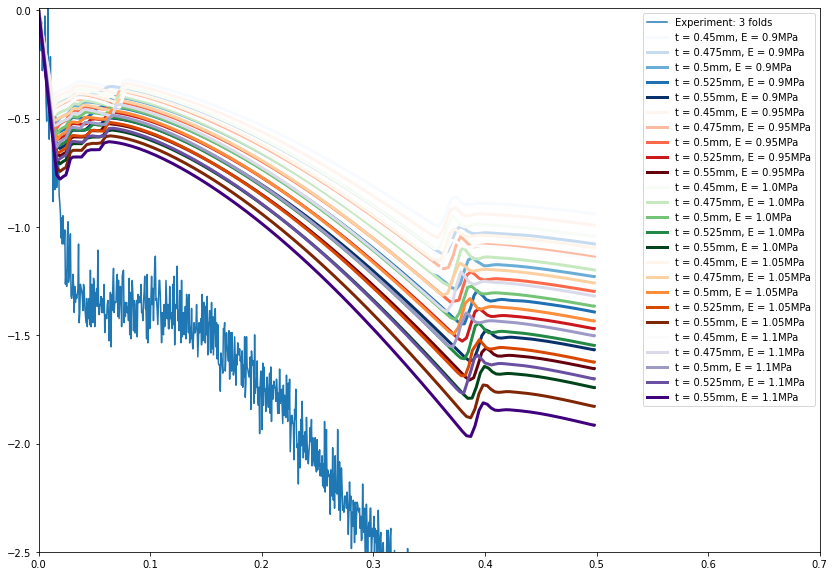

In [24]:
E_try = [0.9, 0.95, 1.0, 1.05, 1.1]
t_try = [0.45, 0.475, 0.5, 0.525, 0.55]
initial_idx = 100

fig, ax = plt.subplots(figsize = (14,10))
ax.plot(vol_3/vol_03, pressure_3, label = 'Experiment: 3 folds')
cmap_all = ['Blues', 'Reds','Greens', 'Oranges', 'Purples']

for i,E in enumerate(E_try):
    for j,t in enumerate(t_try):
        idx_cur = initial_idx + len(E_try)*i + j
        data_cur = np.loadtxt(f'data_out/3fold-fitting-{idx_cur}_pcav_cvol.txt')
        vol_norm = -(data_cur[:,0] - data_cur[0,0])/data_cur[0,0]
        pressure_kpa = data_cur[:,1] * 1e3

        color_plot = plt.get_cmap(cmap_all[i])(j/(len(t_try) - 1))
        ax.plot(vol_norm,pressure_kpa, label = f't = {t}mm, E = {E}MPa', color = color_plot,
            linewidth = 3)

ax.legend(loc = 'best');
ax.set_xlim(left = 0, right = 0.7)
ax.set_ylim(top = 0.01, bottom = -2.5)

(-3.5, 0.01)

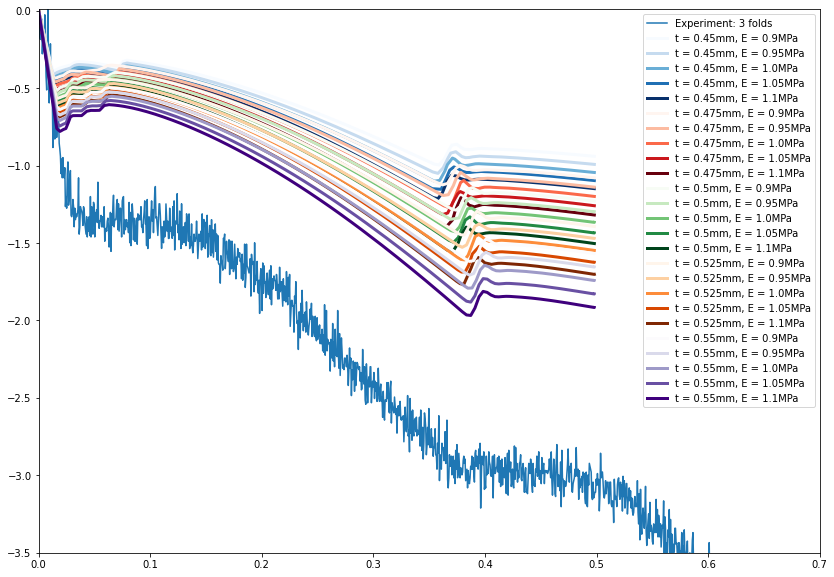

In [28]:
E_try = [0.9, 0.95, 1.0, 1.05, 1.1]
t_try = [0.45, 0.475, 0.5, 0.525, 0.55]
initial_idx = 100

fig, ax = plt.subplots(figsize = (14,10))
ax.plot(vol_3/vol_03, pressure_3, label = 'Experiment: 3 folds')
cmap_all = ['Blues', 'Reds','Greens', 'Oranges', 'Purples']

for i,t in enumerate(t_try):
    for j,E in enumerate(E_try):
        idx_cur = initial_idx + len(E_try)*j + i
        data_cur = np.loadtxt(f'data_out/3fold-fitting-{idx_cur}_pcav_cvol.txt')
        vol_norm = -(data_cur[:,0] - data_cur[0,0])/data_cur[0,0]
        pressure_kpa = data_cur[:,1] * 1e3

        color_plot = plt.get_cmap(cmap_all[i])(j/(len(t_try) - 1))
        ax.plot(vol_norm,pressure_kpa, label = f't = {t}mm, E = {E}MPa', color = color_plot,
            linewidth = 3)

ax.legend(loc = 'best');
ax.set_xlim(left = 0, right = 0.7)
ax.set_ylim(top = 0.01, bottom = -3.5)

(-3.5, 0.01)

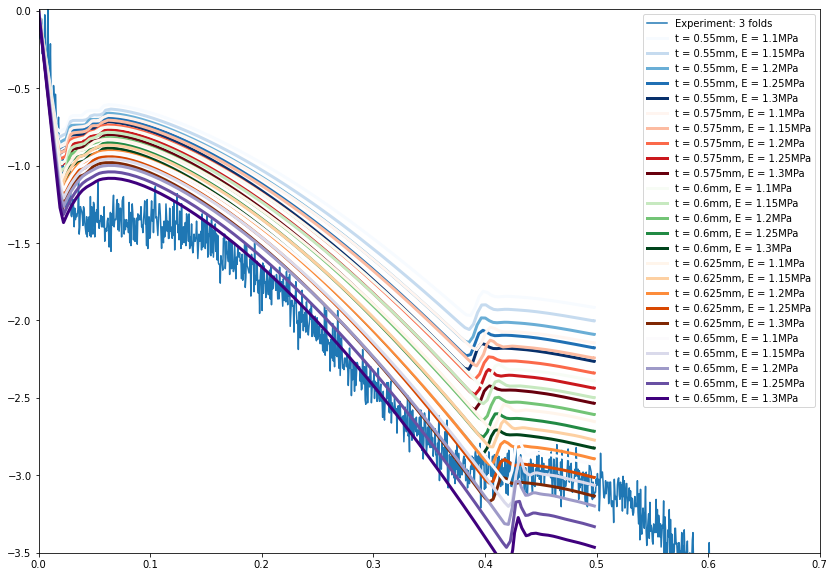

In [92]:
E_try = [1.1, 1.15, 1.2, 1.25, 1.3]
t_try = [0.55, 0.575, 0.6, 0.625, 0.65]
initial_idx = 200

fig, ax = plt.subplots(figsize = (14,10))
ax.plot(vol_3/vol_03, pressure_3, label = 'Experiment: 3 folds')
cmap_all = ['Blues', 'Reds','Greens', 'Oranges', 'Purples']

for i,t in enumerate(t_try):
    for j,E in enumerate(E_try):
        idx_cur = initial_idx + len(E_try)*j + i
        data_cur = np.loadtxt(f'data_out/3fold-fitting-{idx_cur}_pcav_cvol.txt')
        vol_norm = -(data_cur[:,0] - data_cur[0,0])/data_cur[0,0]
        pressure_kpa = data_cur[:,1] * 1e3

        color_plot = plt.get_cmap(cmap_all[i])(j/(len(t_try) - 1))
        ax.plot(vol_norm,pressure_kpa, label = f't = {t}mm, E = {E}MPa', color = color_plot,
            linewidth = 3)

ax.legend(loc = 'best');
ax.set_xlim(left = 0, right = 0.7)
ax.set_ylim(top = 0.01, bottom = -3.5)

# ax.set_xlim(left = 0, right = 0.1)
# ax.set_ylim(top = 0.01, bottom = -2)

(1800,)

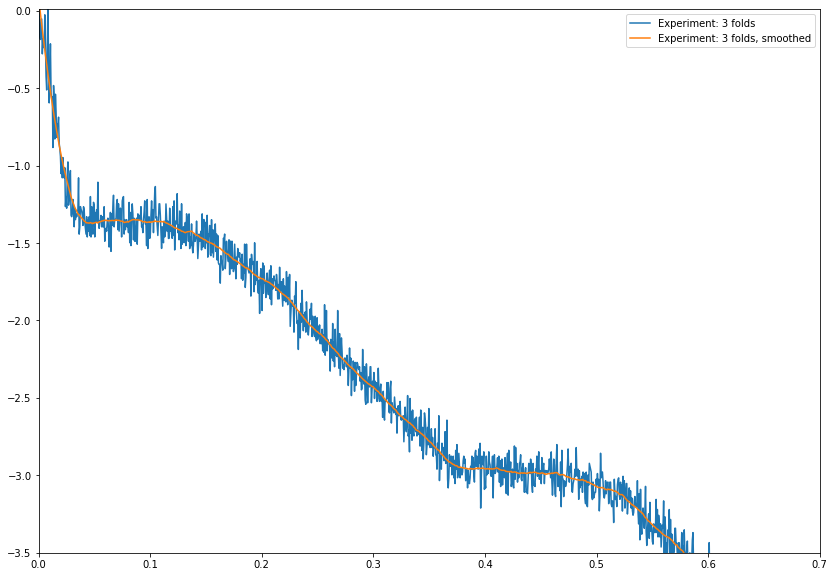

In [53]:
window_len = 100
poly_order = 2
pressure_3_smooth = savgol_filter(pressure_3, window_len, poly_order)

fig, ax = plt.subplots(figsize = (14,10))
ax.plot(vol_3/vol_03, pressure_3, label = 'Experiment: 3 folds')
ax.plot(vol_3/vol_03, pressure_3_smooth, label = 'Experiment: 3 folds, smoothed')
#volume is also an average but in significantly less noisy in comparison

ax.legend(loc = 'best');
ax.set_xlim(left = 0, right = 0.7)
ax.set_ylim(top = 0.01, bottom = -3.5)

np.shape(pressure_3_smooth)

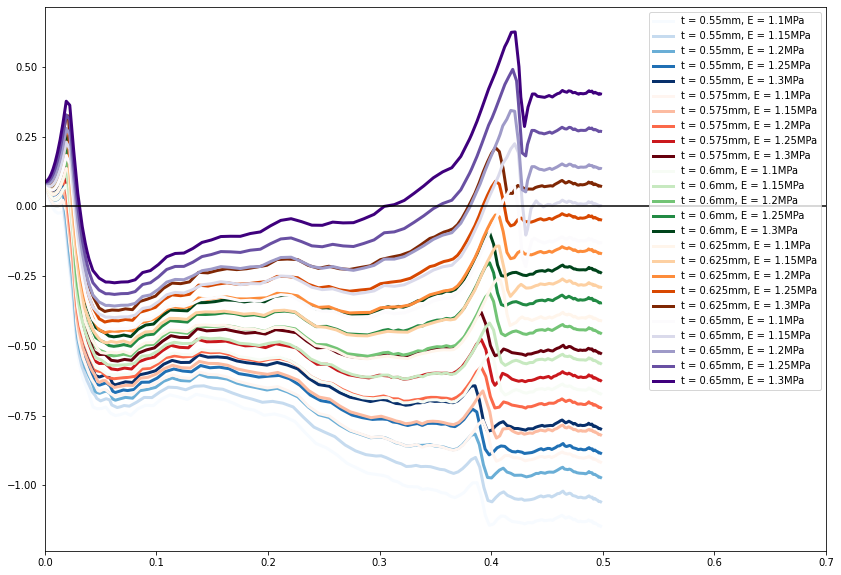

In [93]:
'''Error computation: first as a fxn of time but also on average'''

E_try = [1.1, 1.15, 1.2, 1.25, 1.3]
t_try = [0.55, 0.575, 0.6, 0.625, 0.65]
initial_idx = 200

fig, ax = plt.subplots(figsize = (14,10))
res_all = np.zeros((len(E_try),len(t_try)))
# ax.plot(vol_3/vol_03, pressure_3, label = 'Experiment: 3 folds')
cmap_all = ['Blues', 'Reds','Greens', 'Oranges', 'Purples']


for i,t in enumerate(t_try):
    for j,E in enumerate(E_try):
        idx_cur = initial_idx + len(E_try)*j + i
        data_cur = np.loadtxt(f'data_out/3fold-fitting-{idx_cur}_pcav_cvol.txt')
        vol_norm = -(data_cur[:,0] - data_cur[0,0])/data_cur[0,0]
        pressure_kpa = data_cur[:,1] * 1e3

        sim_data_len = len(pressure_kpa)

        #downsample exp data to match sim data length
        pressure_exp_downsample = np.interp(vol_norm, vol_3/vol_03, pressure_3_smooth)
        
        error_cur = pressure_exp_downsample - pressure_kpa
        res_all[i,j] = np.linalg.norm(error_cur)


        color_plot = plt.get_cmap(cmap_all[i])(j/(len(t_try) - 1))
        ax.plot(vol_norm,error_cur, label = f't = {t}mm, E = {E}MPa', color = color_plot,
            linewidth = 3)
ax.plot([0,0.7],[0,0],color = 'black')
ax.set_xlim(left = 0, right = 0.7)
ax.legend(loc = 'best');

In [63]:
res_all

array([[11.47866367, 10.74021897,  9.87651779,  9.11756649,  8.23325132],
       [ 9.26466011,  8.43640643,  7.41855983,  6.54374618,  5.63258963],
       [ 7.15695336,  6.1607028 ,  5.23285088,  4.28525712,  3.39188357],
       [ 4.86177629,  3.82023337,  2.99462768,  2.32944923,  2.08400643],
       [ 2.82055595,  2.26023301,  2.26830354,  2.85252626,  3.73633135]])

19

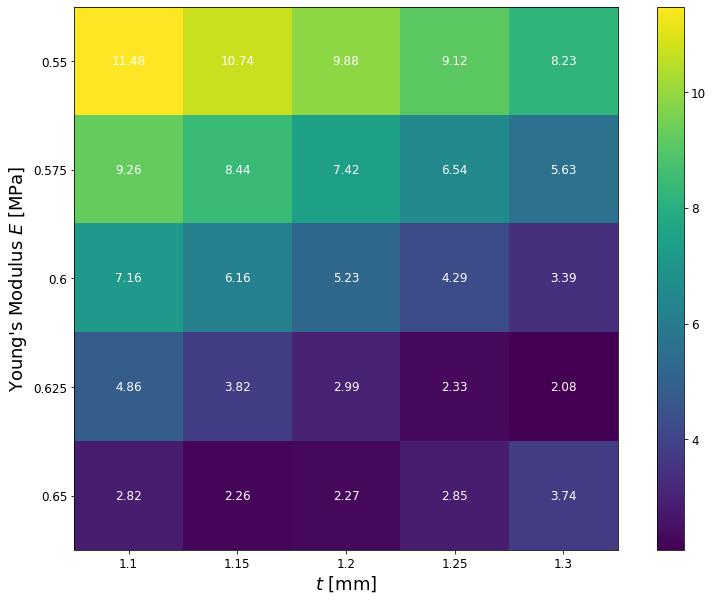

In [90]:
E_try = [1.1, 1.15, 1.2, 1.25, 1.3]
t_try = [0.55, 0.575, 0.6, 0.625, 0.65]

#todo: there's a strong chance this is flipepd in some way pls fix/check

fig, ax = plt.subplots(figsize = (14,10))
cmap=plt.cm.viridis

cs = ax.imshow(res_all, cmap = cmap)
ax.set_yticks(np.arange(len(t_try)), labels=t_try, fontsize = 12)
ax.set_xticks(np.arange(len(E_try)), labels=E_try, fontsize = 12)
ax.set_xlabel("$t$ [mm]", fontsize = 18)
ax.set_ylabel("Young's Modulus $E$ [MPa]", fontsize = 18)

cbar = plt.colorbar(cs)
cbar.ax.tick_params(labelsize=12)

# cbar = plt.colorbar()
# cbar.solids.set_edgecolor("face")
# draw()

# Loop over data dimensions and create text annotations.
for i,t in enumerate(t_try):
    for j,E in enumerate(E_try):
        text = ax.text(j, i, round(res_all[i, j],2),ha="center", va="center", color="w", fontsize = 12)

#(1.3,0.625) has min error but all errors are quite large?
#i is t and j is E